# Code soft - project - 1 - Titanic Survival Prediction

## Importing the libaries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Display the first few rows of the DataFrame to get an overview of the data
df = pd.read_csv('tested.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [4]:
# Step 2: Handling Null Values
# Check for null values in each column
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [5]:
# If there are null values, you may choose to fill or drop them based on your data and analysis needs
# For example, filling null values in the 'Age' column with the mean age
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [6]:
# Step 3: Data Preparation
# Drop unnecessary columns for the model
df.drop(['Cabin'], axis=1, inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S


## Visualizations 

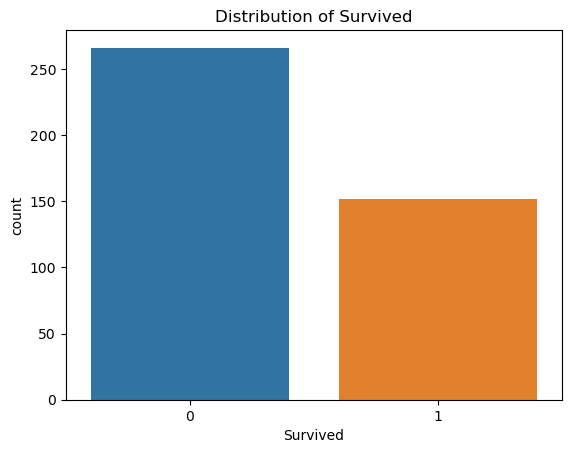

In [7]:
# Visualize - 1 the distribution of the target variable
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survived')
plt.show()

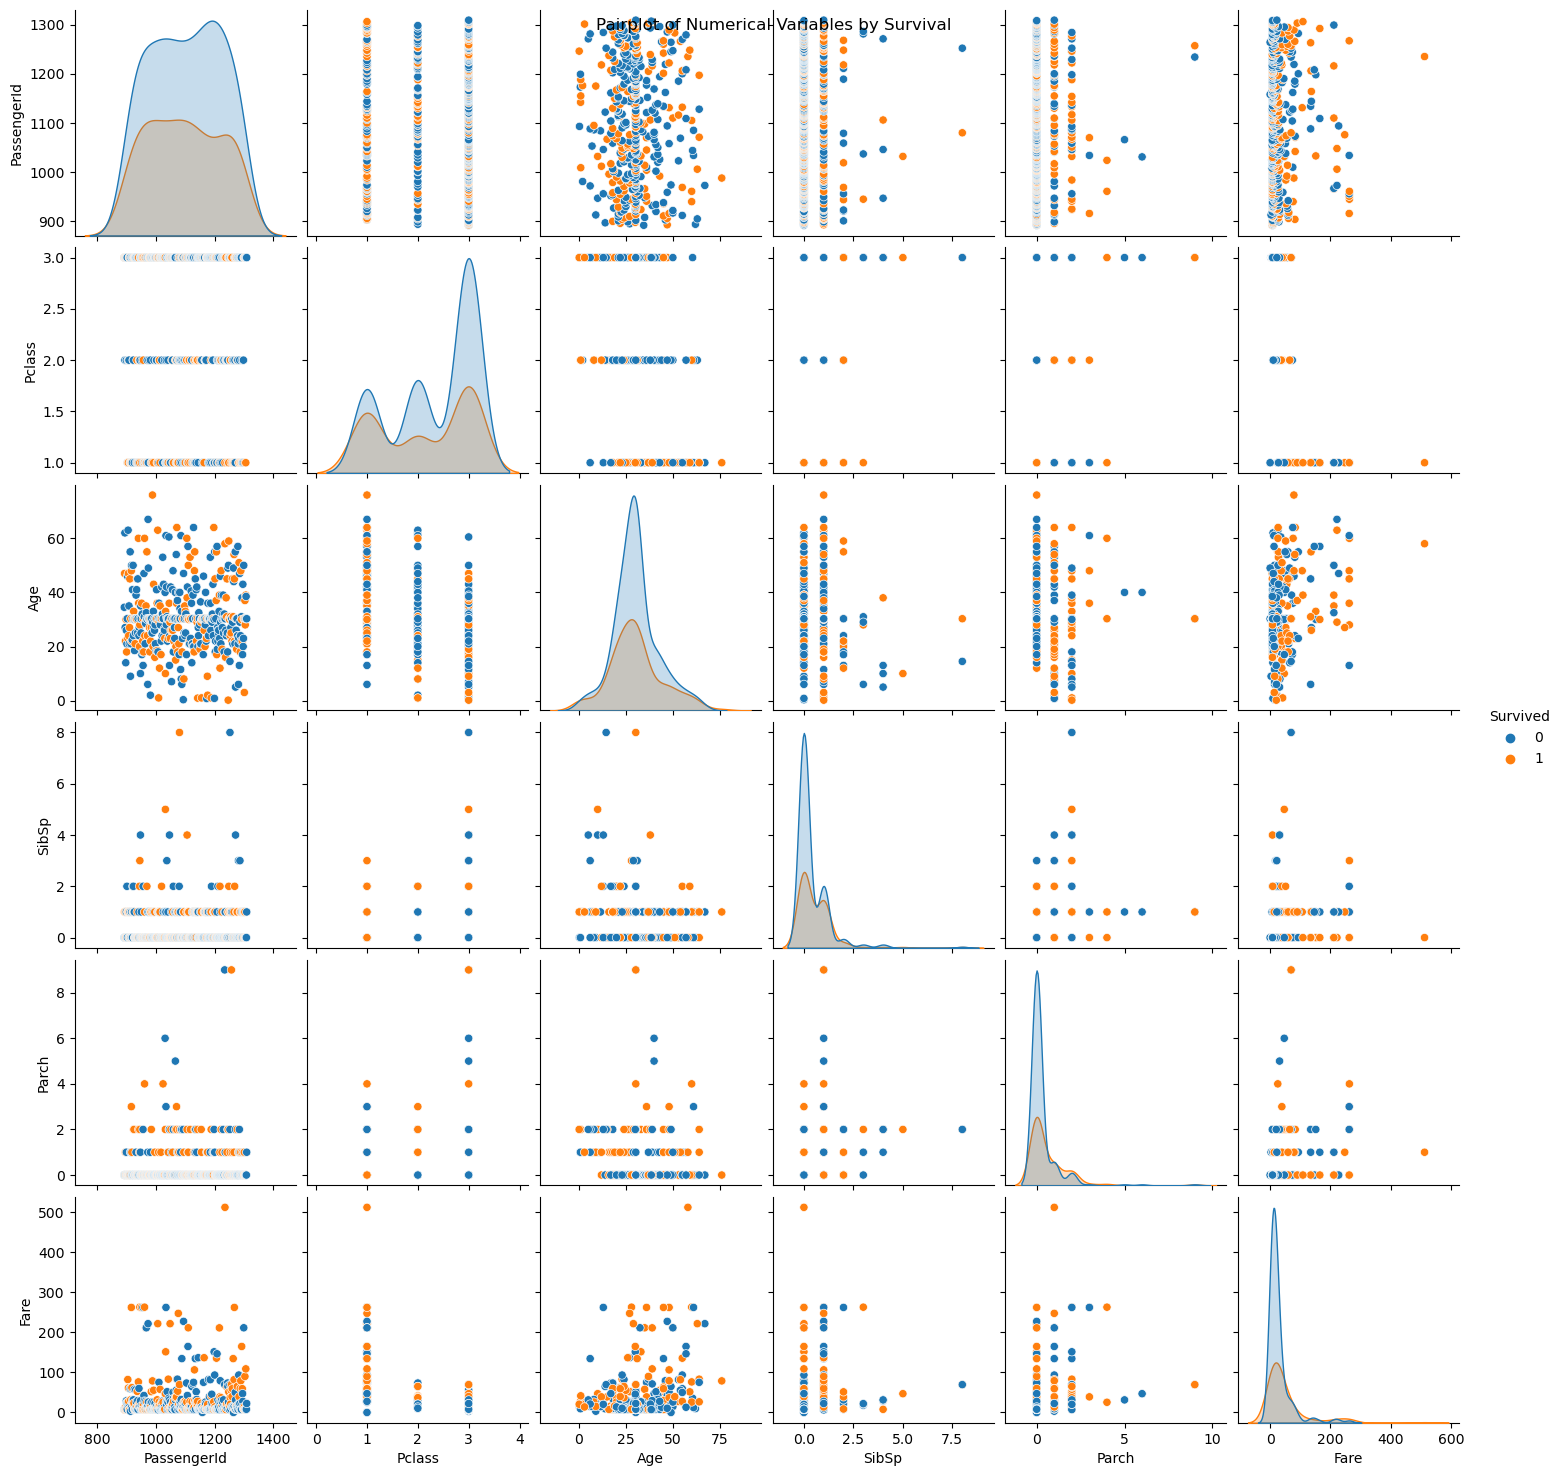

In [8]:
# Visual - 2  Create a pairplot to visualize relationships between numerical variables
sns.pairplot(df, hue='Survived', diag_kind='kde')
plt.suptitle("Pairplot of Numerical Variables by Survival")
plt.show()

C:\Users\91630\AppData\Local\Temp\ipykernel_9420\928913855.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


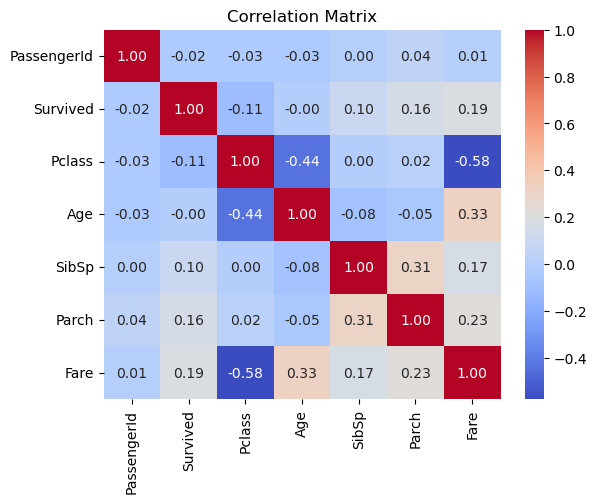

In [9]:
# Visual - 3  Create a correlation matrix to understand the relationships between variables
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Pivot tables for selected numerical features by 'Survived' class
pd.pivot_table(df, index='Survived', values=['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.272699,27.558326,0.274436,0.379699
1,30.272400,49.747699,0.598684,0.565789


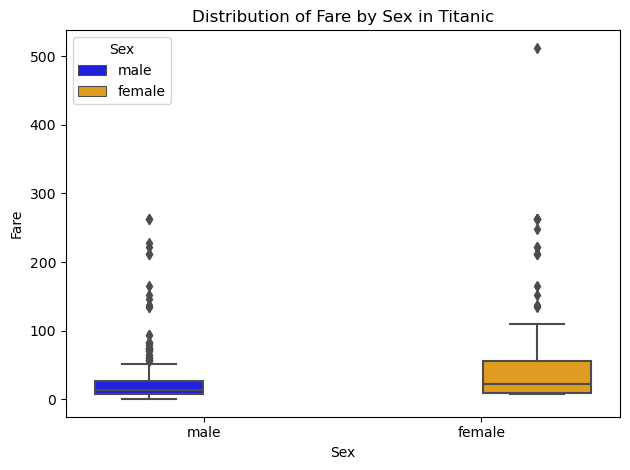

In [24]:
# Creating a box plot for Distribution of Fare by Sex in Titanic
sns.boxplot(x='Sex', y='Fare', data=df, hue='Sex', palette=['blue', 'orange'])
plt.xlabel('Sex')
plt.ylabel('Fare')
plt.title('Distribution of Fare by Sex in Titanic')
plt.tight_layout()
plt.show()

In [11]:
df['Name_Length'] = df['Name'].apply(lambda x: len(str(x)))
# Separate the target variable ('Survived') from the features
X = df[['Name_Length']]
y = df['Survived']

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create dummy variables for categorical features
all_dummies = pd.get_dummies(df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']])

In [14]:
# Initialize the logistic regression model
model = LogisticRegression()

In [15]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Make predictions on the test set
y_pred = model.predict(X_test)
# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the count of predicted values
print("Predicted Count:")
print(pd.Series(y_pred).value_counts())

Predicted Count:
0    65
1    19
dtype: int64


In [19]:
# Calculate the percentage of predictions for each class
percentage_survived = (y_pred.sum() / len(y_pred)) * 100
percentage_not_survived = 100 - percentage_survived

# Print the percentages
print(f"Percentage Predicted Survived: {percentage_survived:.2f}%")
print(f"Percentage Predicted Not Survived: {percentage_not_survived:.2f}%")


Percentage Predicted Survived: 22.62%
Percentage Predicted Not Survived: 77.38%


In [21]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.80
Confusion Matrix:
[[49  1]
 [16 18]]


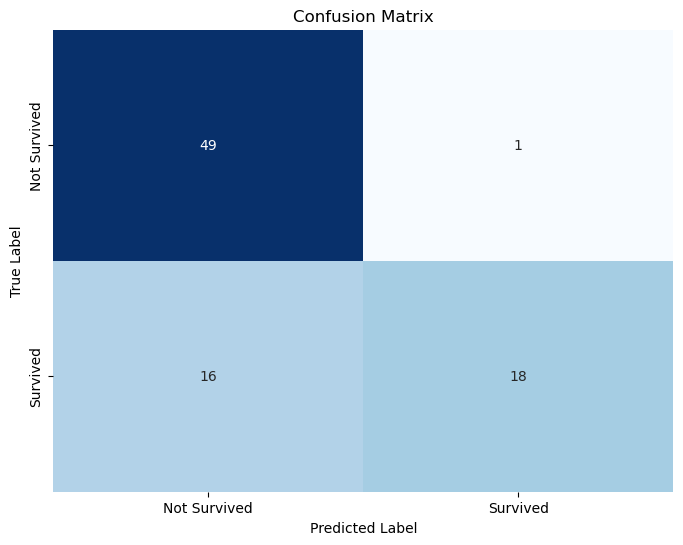

In [18]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix for better visualization
cm_df = pd.DataFrame(cm, index=['Not Survived', 'Survived'], columns=['Not Survived', 'Survived'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()